<a href="https://colab.research.google.com/github/imnamnngom/leftthings/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')  #와인 퀄리티 파일 불러오기

In [ ]:
#for setting up train and test sets
from sklearn.model_selection import train_test_split  # 테스트 파일 분류해줄 라이브러리 가져오기
from sklearn.preprocessing import StandardScaler #표준화; 너무 오차가 크면 작은 숫자는 영향이 없기 
#때문에 평균과 분산을 이용해 1~0값으로 만듬

In [ ]:
y = red_wine['quality']  #목표변수
x = red_wine.drop(columns = 'quality')  #독립변수

In [ ]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) #다른 모델 사용시 일관성을 주기위한 rmadaom_state

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
sc = StandardScaler() #표준화
x_train = sc.fit_transform(x_train) #학습 데이터는 fit 사용 
x_test = sc.transform(x_test)  #테스트 데이터는 fit 사용하면 안됌.

In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
#레이어 만듬 
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(2024, activation='relu'),  #히든 레이어는 activation를 relu로
    layers.Dropout(0.3),   #오버피팅 막기위해 드랍아웃 30%
    layers.BatchNormalization(),  #베치라이제이션 또한 오버피팅 막기위해서
    layers.Dense(4048, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(2024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])   #항아리 모양식 레이어

In [ ]:
 from tensorflow import keras
 from tensorflow.keras import layers, callbacks
#콜백 라이브러리 만듬.
 early_stopping = callbacks.EarlyStopping(
     min_delta=0.001, # minimium amount of change to count as an improvement
     patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
 )

In [ ]:
model.compile(
    optimizer='adam', #sgd,rmsprop adam등 이 있는데 adam 사용
    loss='mae', 
)

In [ ]:
model.summary()  #모델 요약

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              12288     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2024)              2074600   
                                                                 
 dropout_1 (Dropout)         (None, 2024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2024)             8096      
 hNormalization)                                        

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=256,
    epochs=300,  #입학 횟수 
    callbacks=[early_stopping],  #얼리 스탑 기동여부
    verbose=1  #보드를 보여주냐 마냐 없으면 그냥 보여주는걸로 기본값 설정 되어 있음.
)

Epoch 1/300
5/5 [==============================] - 3s 256ms/step - loss: 5.5737 - val_loss: 5.2973
Epoch 2/300
5/5 [==============================] - 0s 93ms/step - loss: 5.4578 - val_loss: 5.1939
Epoch 3/300
5/5 [==============================] - 0s 77ms/step - loss: 5.2457 - val_loss: 4.2870
Epoch 4/300
5/5 [==============================] - 0s 76ms/step - loss: 4.9946 - val_loss: 4.2188
Epoch 5/300
5/5 [==============================] - 0s 86ms/step - loss: 4.7683 - val_loss: 3.9152
Epoch 6/300
5/5 [==============================] - 0s 74ms/step - loss: 4.4824 - val_loss: 3.1083
Epoch 7/300
5/5 [==============================] - 0s 86ms/step - loss: 4.1587 - val_loss: 2.9056
Epoch 8/300
5/5 [==============================] - 0s 77ms/step - loss: 3.7811 - val_loss: 2.8049
Epoch 9/300
5/5 [==============================] - 0s 65ms/step - loss: 3.3299 - val_loss: 2.6843
Epoch 10/300
5/5 [==============================] - 0s 80ms/step - loss: 2.8333 - val_loss: 2.3359
Epoch 11/300
5/5 [

Minimum Validation Loss: 0.4454


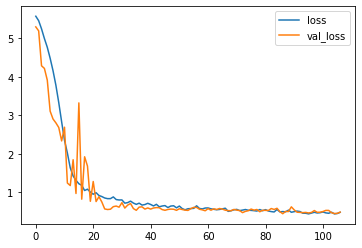

In [ ]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [ ]:
#dnn예측값
dnn_pred=model.predict(x_test)

### **knn모형**




In [ ]:
from sklearn import neighbors  #인접값 라이브러리 가져오기
from sklearn.preprocessing import MinMaxScaler  #최솟값과 최댓값으로 표준화하는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
red_wine = pd.read_csv('winequality-red.csv')  #원래 파일 불러오기

In [ ]:
target = red_wine['quality']   #목표변수를 해당 파일의 quality로 가져오기
features = red_wine.drop('quality', axis = 1)  #axis=1은 열방향으로 동작하여 변수를 가져옴

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)   #데이터중 20%를 테스트 data 나머지를 training data로 가져옴

scaler = MinMaxScaler(feature_range=(0, 1))  #표준화의 방법으로 최대값1 최솟값 0

In [ ]:
X_train = scaler.fit_transform(X_train)  #train 데이터를 표준화
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)  #test 데이터를 표준화 
X_test = pd.DataFrame(X_test)

In [ ]:
mae_error = []        #mae 값 리스트 미리 만들어두고 여기에 저장

for K in range (1, 100):   #인접한 k 값을 1부터 loop반복 실행 99번째 까지 실행
  model = neighbors.KNeighborsRegressor(n_neighbors = K)
  model.fit(X_train, Y_train)
  pred = model.predict (X_test)
  error = mean_absolute_error(Y_test, pred)  # squared=false는 mse를 rmse로 변경 시켜줌.
  mae_error.append(error) #error에 값 넣어줌.

In [ ]:
x = np.linspace(1,99, num = 99)  #그래프 그리기 위해서 x 값 설정 1~99를 99로 나누어서 넣음 즉, 99번 위에 돌린 값 x 
y = mae_error  #y값은 로스 값.

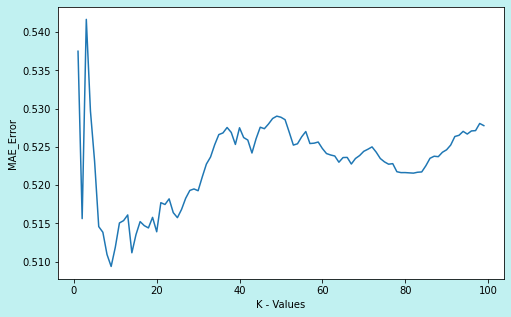

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), facecolor="#c1f1f1")
ax.plot(x, y)   #그래프 그림.

#annot_optimum(x, y)
plt.xlabel('K - Values')
plt.ylabel('MAE_Error')
plt.show ( )


In [ ]:
#knn예측값
knn_model=model.predict(X_test)


### **랜덤포레스트**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트 불러오기

In [ ]:
from sklearn.model_selection import train_test_split #데이터분류 위에 되어 있지만 다시 가져옴

In [ ]:
import pandas as pd  #넘파이, 팬다스, 팬다스 프로파일 가져옴
import numpy as np
import pandas_profiling  #팬다스 프로파일은 null값등 여러 값을 정리해서 보여주는 기능

In [ ]:
%matplotlib inline  
#브라우저에서 바로 그림을 볼 수 있도록 하는 커맨드

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df.columns  #feature_names에 df의 열들을 넣어줌

In [ ]:
a = df.drop('quality', axis =1).values  #axis=1은 열방향으로 작동 x변수 열방향으로 넣고 quality열은 해당x
b = df['quality'].values #목표변수인 y를 설정
print(a.shape)
print(b.shape)

(1599, 11)
(1599,)


In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, train_size=0.7, random_state=42, shuffle=True)
#테스트와 트레인 데이타 분류

In [ ]:
rf = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='log2', max_depth=15)
#rf는 랜덤포레스트로 트리 500개, 깊이는 최대 15로 설정 criterion='entropy 로 설정한다. max_feature은 최상 분할을 검색할때 고려할 변수로 log2임으로 설정.

In [ ]:
rf.fit(a_train, b_train) #모델 fitting

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=500)

In [ ]:
a_predict = rf.predict(a_test) #x테스트 값을 넣어서 예측 실행

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
rf_mae=mean_absolute_error(b_test,a_predict)
rf_mae  #rf_mae는 랜덤포레스트의 mae값.

0.34791666666666665

In [ ]:
#making the predictions dnn예측값
#dnn_pred = model.predict(X_test)

**LOSS비교**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
#getting our results
dnn_mae = mean_absolute_error(y_test,dnn_pred)
# dnn의 mae 값 프린트
print("DNN_MAE =",(round(dnn_mae,2)))

DNN_MAE = 0.45


In [ ]:
knn_mae=mean_absolute_error(Y_test,knn_model) #knn_mae 는 knn mae값
print("mae =",(round(knn_mae,2)))

mae = 0.53


In [ ]:
knn_mae

0.5277777777777777

In [ ]:
#result table 결과 화면을 만들어주는 import 불러옴
from tabulate import tabulate

In [ ]:
#gathering the results 결과로 불러올 딥러닝, knn 모형 리스트 형식으로 저장.
result_table = [['Deep Learning', round(dnn_mae,2)],['KNN',round(knn_mae,2)],['RF',round(rf_mae,2)]]

#defining header names
col_names = ["Model", "MAE"]

#creating a results table
print(tabulate(result_table, headers=col_names))

Model            MAE
-------------  -----
Deep Learning   0.45
KNN             0.53
RF              0.35
